In [1]:
"""
Created on Tue Oct 30 17:21:41 2018

@author: carlos
"""
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

np.random.seed(2019)

In [2]:
def gen_piecewise_constant(n,prob,minsep):
    signal = np.zeros(n)
    ind = 0
    val = np.random.randn()
    while ind < n:
        if ind + minsep > n:
            signal[ind:] = val
            break
        if ind == 0 or np.random.rand() < prob:
            val = np.random.randn()
            if ind + minsep > n:
                signal[ind:] = val
                break
            else:
                signal[ind:(ind+minsep)] = val
                ind += minsep
        else:
            signal[ind] = val
            ind += 1
    return signal

# Generate data using piece-wise constant function

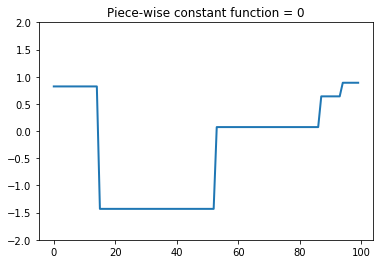

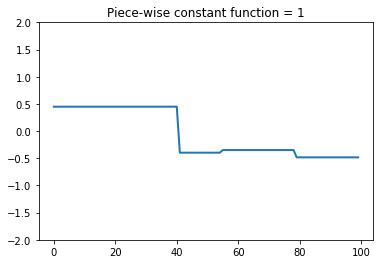

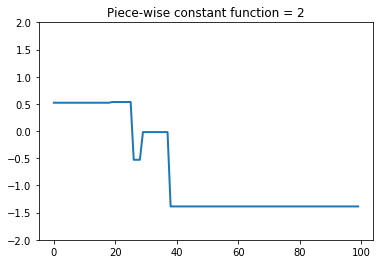

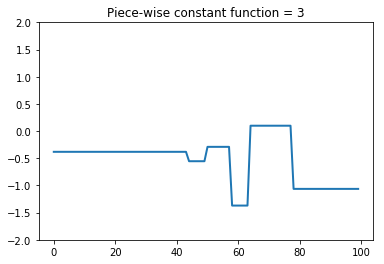

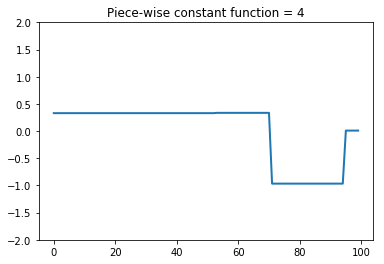

In [3]:
n=100
prob = 0.04 
minsep=1
n_tries = int(5e4)

mean = np.zeros(n)
corr = np.zeros((n,n))
n_plot = 5
# counter = 0
for ind in range(n_tries):
    segment = gen_piecewise_constant(n,prob,minsep)
    mean += segment / n_tries
    corr += np.outer(segment,segment) / n_tries 
    if ind < n_plot:
        plt.figure()
        plt.plot(segment,lw=2)
        plt.ylim((-2,2))
        plt.title('Piece-wise constant function = {}'.format(ind))

# Visualize the data

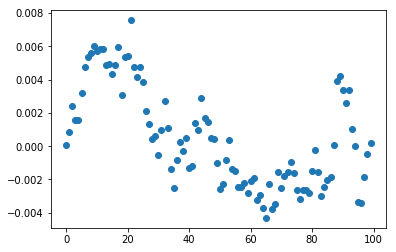

In [4]:
plt.figure()
plt.plot(mean,'o')

# Visualize the covariance matrix

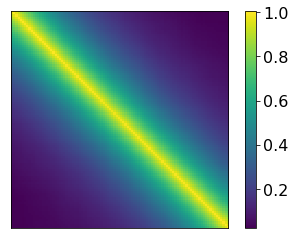

In [5]:
cov = corr - np.outer(mean,mean)
plt.figure()
plt.imshow(cov)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16) 

# Eigen decomposition of the covariance matrix

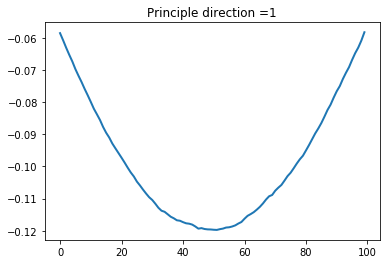

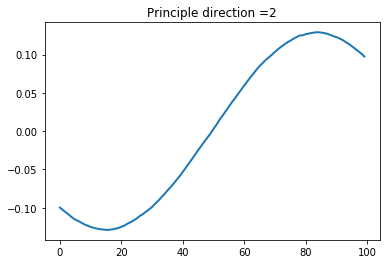

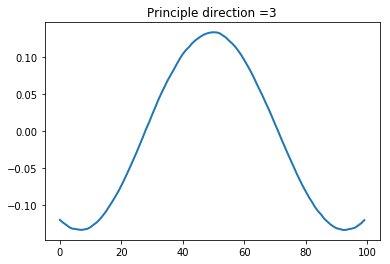

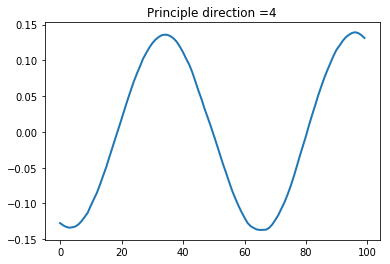

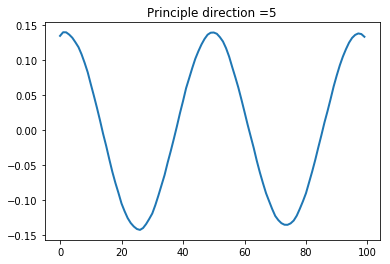

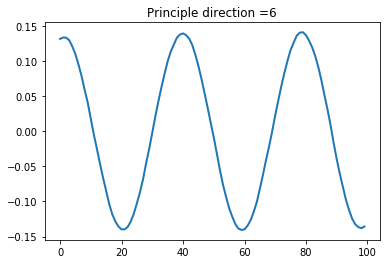

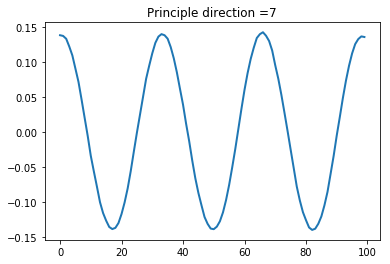

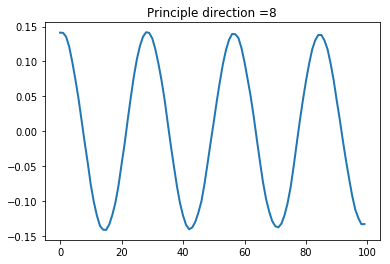

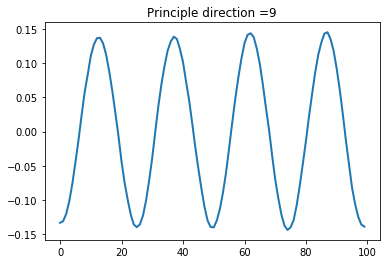

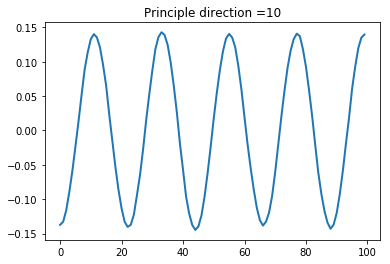

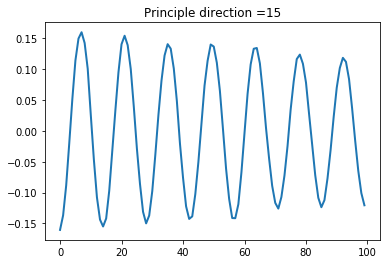

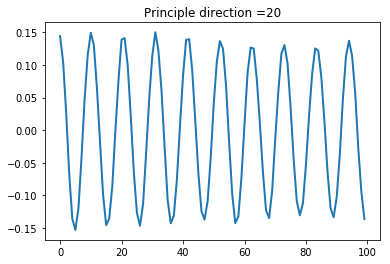

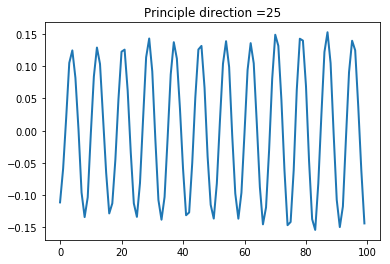

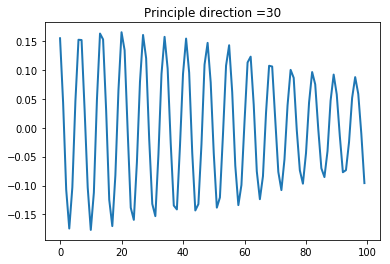

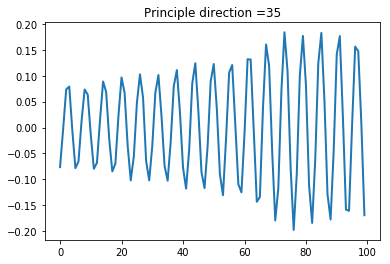

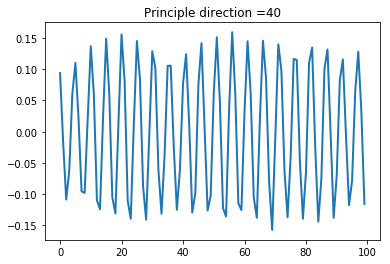

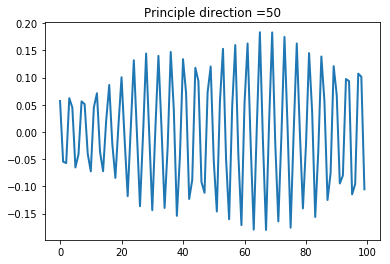

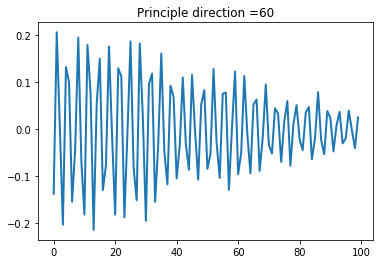

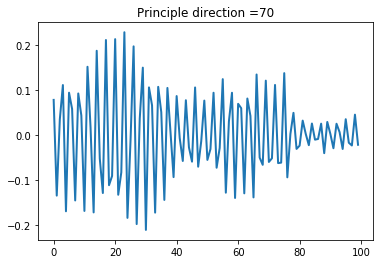

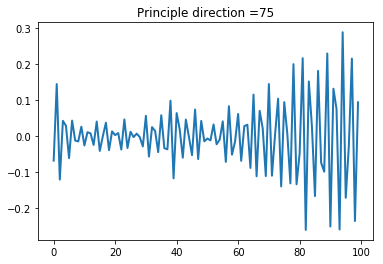

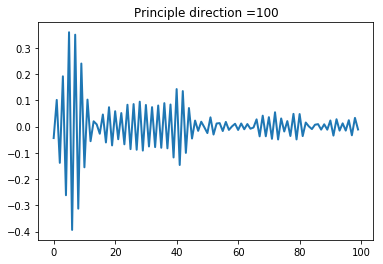

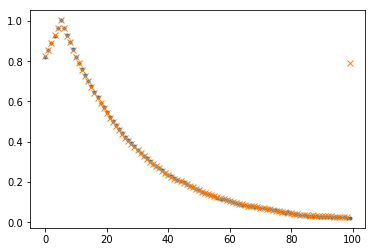

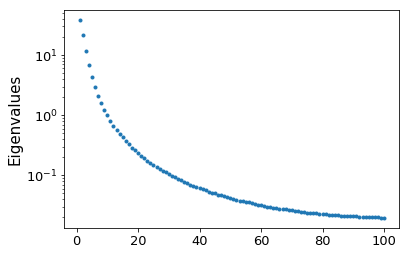

In [7]:
u,s,vT = np.linalg.svd(cov) 

eigenvector_inds = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,75,100]
for ind in eigenvector_inds:
    plt.figure()
    plt.plot(u[:,ind-1],lw=2)
    plt.title('Principle direction ={}'.format(ind))

plt.figure()
plt.plot(cov[5,:],'.')
plt.plot(np.roll(cov[6,:],-1),'x')

plt.figure()
plt.plot(range(1,len(s)+1),s,'.')
plt.yscale('log')
plt.ylabel('Eigenvalues',fontsize=15)
plt.tick_params(labelsize=13)